# Principal Component Analysis for Stellar Classification

### Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2




```
# This is formatted as code
```

## Dataset

Database Description:

The database used in this project contains information related to various types of glass materials, with a focus on their composition and properties. Each entry in the database corresponds to a specific sample of glass, and the dataset includes both numerical and categorical attributes. Below is a detailed description of the key components of the database:

Refractive Index (RI):

The refractive index is a crucial optical property that describes how light propagates through the glass material. It influences the transparency and optical behavior of the glass.
Chemical Composition:

The database includes concentrations of several chemical elements present in the glass composition. These elements may include:
Sodium (Na)
Magnesium (Mg)
Aluminum (Al)
Silicon (Si)
Potassium (K)
Calcium (Ca)
Barium (Ba)
Iron (Fe)
Type of Glass (Target Variable):

The type of glass serves as the target variable or label, categorizing each glass sample into distinct types. This categorical variable indicates the intended application or characteristics of the glass.
Additional Attributes:

Depending on the dataset, additional attributes related to the physical and chemical properties of the glass may be present. These could include density, thickness, or other relevant measures.
Purpose of the Database:
The database is designed for exploratory data analysis, classification, and pattern recognition tasks. It enables researchers and analysts to study the relationships between the chemical composition of glass and its optical properties. The inclusion of the target variable facilitates supervised machine learning approaches for predicting and classifying the type of glass based on its features.

Data Source:
The data may have been collected through laboratory experiments, manufacturing processes, or other scientific investigations. It is essential to document the source of the data to ensure transparency and enable reproducibility in future studies.

Data Preprocessing:
Prior to analysis, the dataset may undergo preprocessing steps, such as handling missing values, scaling numerical features, and encoding categorical variables. These steps aim to ensure the quality and compatibility of the data for subsequent analytical techniques.

Data Format:
The data is typically organized in a tabular format, where each row corresponds to an individual glass sample, and each column represents a specific attribute or feature. The database may be stored in a standard file format such as CSV (Comma-Separated Values) for ease of access and analysis using various data analysis tools and programming languages.

In [4]:
# loads csv file into pandas dataframe
df = pd.read_csv("https://raw.githubusercontent.com/poojeshmutra/PoojeshReddyM-6220/main/glass.csv", names = ['ID', 'refractive_index', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron', 'glass_type'])
df = df.drop(df.columns[0], axis=1)
targetVariable = df['glass_type']
df = df.drop(columns=['Sodium','Magnesium','Silicon','Iron'])
df

,refractive_index,Aluminum,Potassium,Calcium,Barium,glass_type
0,1.52101,1.10,0.06,8.75,0.00,1
1,1.51761,1.36,0.48,7.83,0.00,1
2,1.51618,1.54,0.39,7.78,0.00,1
3,1.51766,1.29,0.57,8.22,0.00,1
4,1.51742,1.24,0.55,8.07,0.00,1
...,...,...,...,...,...,...
209,1.51623,2.88,0.08,9.18,1.06,7
210,1.51685,1.99,0.00,8.40,1.59,7
211,1.52065,2.02,0.00,8.44,1.64,7
212,1.51651,1.94,0.00,8.48,1.57,7


In [5]:
len(df.index)

214

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   refractive_index  214 non-null    float64
 1   Aluminum          214 non-null    float64
 2   Potassium         214 non-null    float64
 3   Calcium           214 non-null    float64
 4   Barium            214 non-null    float64
 5   glass_type        214 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 10.2 KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  2


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


### Exploratory Data Analysis

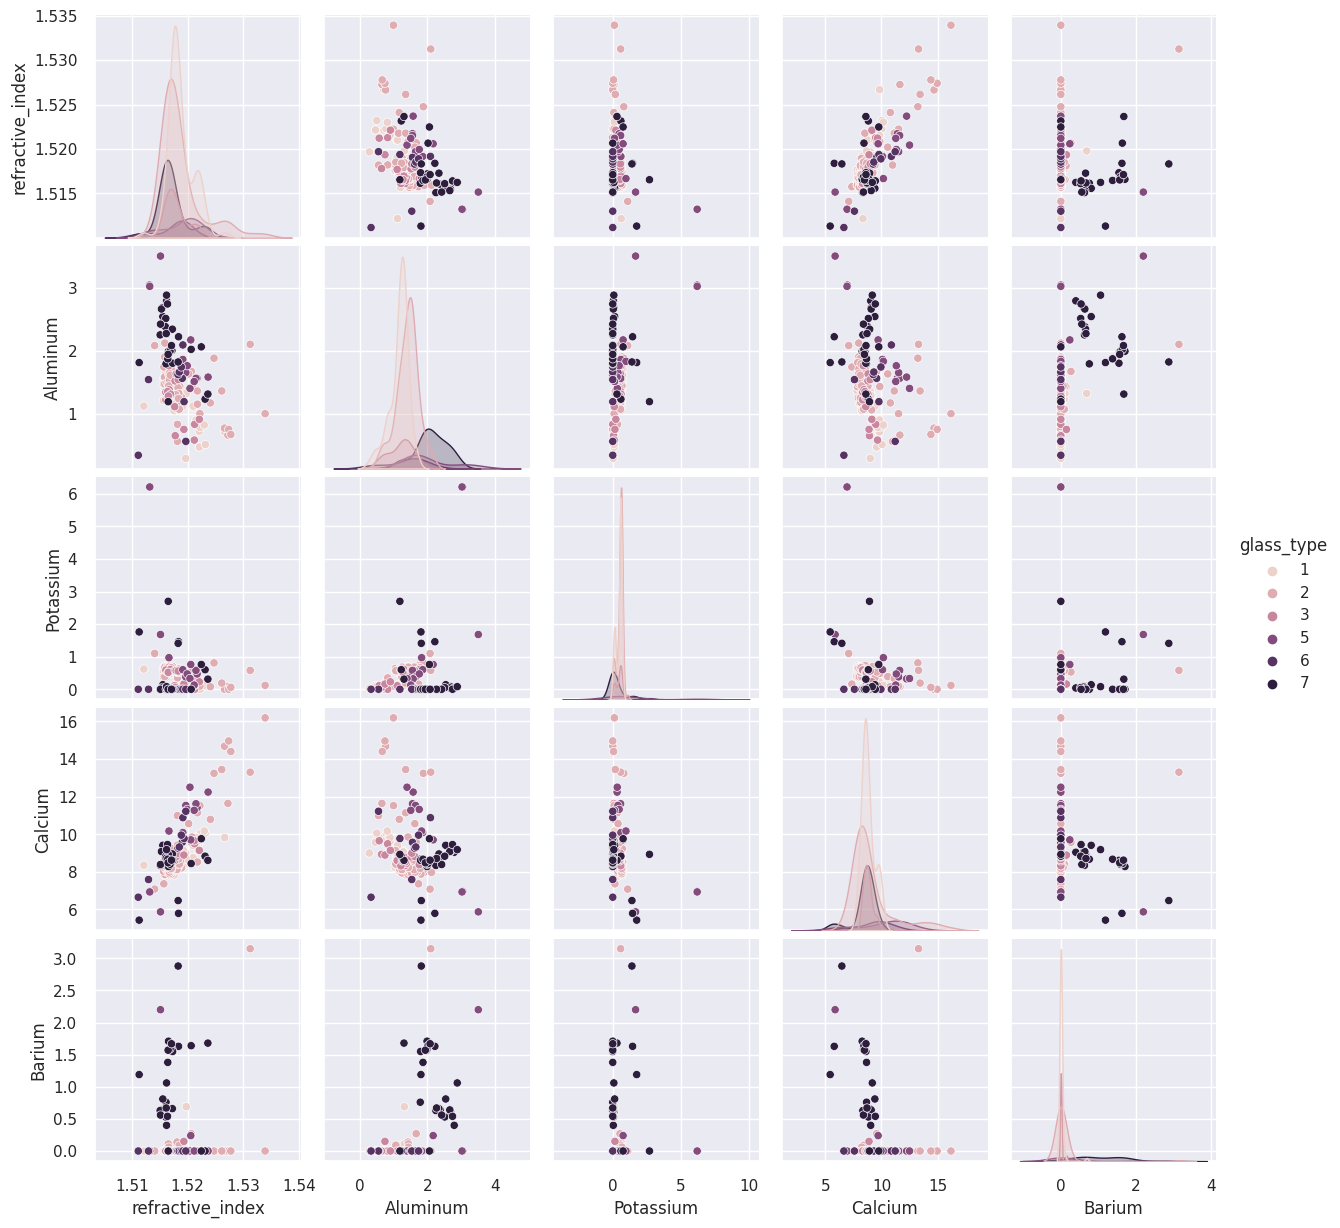

In [ ]:
sns.pairplot(df, hue='glass_type') #Visualize data distribution using pair plot
plt.show()

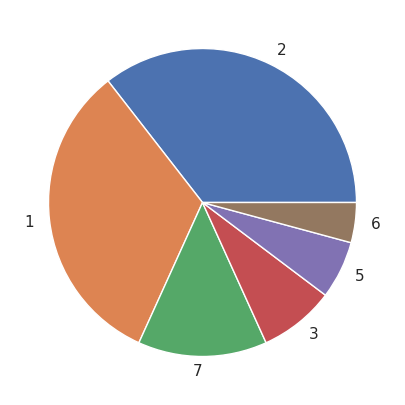

In [ ]:
y =df['glass_type']
y.value_counts().plot(kind='pie')   # pie chart
plt.ylabel('')
plt.show()

### Data Matrix

In [ ]:
X = df.drop(columns=['glass_type']) #drop column class to standardize data
X.head(10)

,refractive_index,Aluminum,Potassium,Calcium,Barium
0,1.52101,1.10,0.06,8.75,0.0
1,1.51761,1.36,0.48,7.83,0.0
2,1.51618,1.54,0.39,7.78,0.0
3,1.51766,1.29,0.57,8.22,0.0
4,1.51742,1.24,0.55,8.07,0.0
5,1.51596,1.62,0.64,8.07,0.0
6,1.51743,1.14,0.58,8.17,0.0
7,1.51756,1.05,0.57,8.24,0.0
8,1.51918,1.37,0.56,8.30,0.0
9,1.51755,1.36,0.57,8.40,0.0


In [ ]:
X.describe().transpose() #Descriptive statistics summary

,count,mean,std,min,25%,50%,75%,max
refractive_index,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Aluminum,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Potassium,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Calcium,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Barium,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000


### Standardize the Data

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns                     #This is done to retain the column names after standardization
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,refractive_index,Aluminum,Potassium,Calcium,Barium
0,0.872868,-0.692442,-0.671705,-0.145766,-0.352877
1,-0.249333,-0.170460,-0.026213,-0.793734,-0.352877
2,-0.721318,0.190912,-0.164533,-0.828949,-0.352877
3,-0.232831,-0.310994,0.112107,-0.519052,-0.352877
4,-0.312045,-0.411375,0.081369,-0.624699,-0.352877
5,-0.793931,0.351521,0.219689,-0.624699,-0.352877
6,-0.308744,-0.612137,0.127475,-0.554268,-0.352877
7,-0.265836,-0.792823,0.112107,-0.504966,-0.352877
8,0.268859,-0.150384,0.096738,-0.462707,-0.352877
9,-0.269137,-0.170460,0.112107,-0.392276,-0.352877


In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
refractive_index,214.0,-2.877034e-14,1.002345,-2.381516,-0.608273,-0.226229,0.261433,5.137232
Aluminum,214.0,-2.988264e-16,1.002345,-2.318616,-0.511756,-0.170460,0.371598,4.125851
Potassium,214.0,3.527811e-17,1.002345,-0.763919,-0.575650,0.089053,0.173582,8.780145
Calcium,214.0,-3.154278e-16,1.002345,-2.484084,-0.504966,-0.251413,0.151806,5.094318
Barium,214.0,-6.640586e-17,1.002345,-0.352877,-0.352877,-0.352877,-0.352877,5.997210


### Observations and variables

In [ ]:
observations = list(df.index)
variables = list(df.columns)

### Box and Whisker Plots

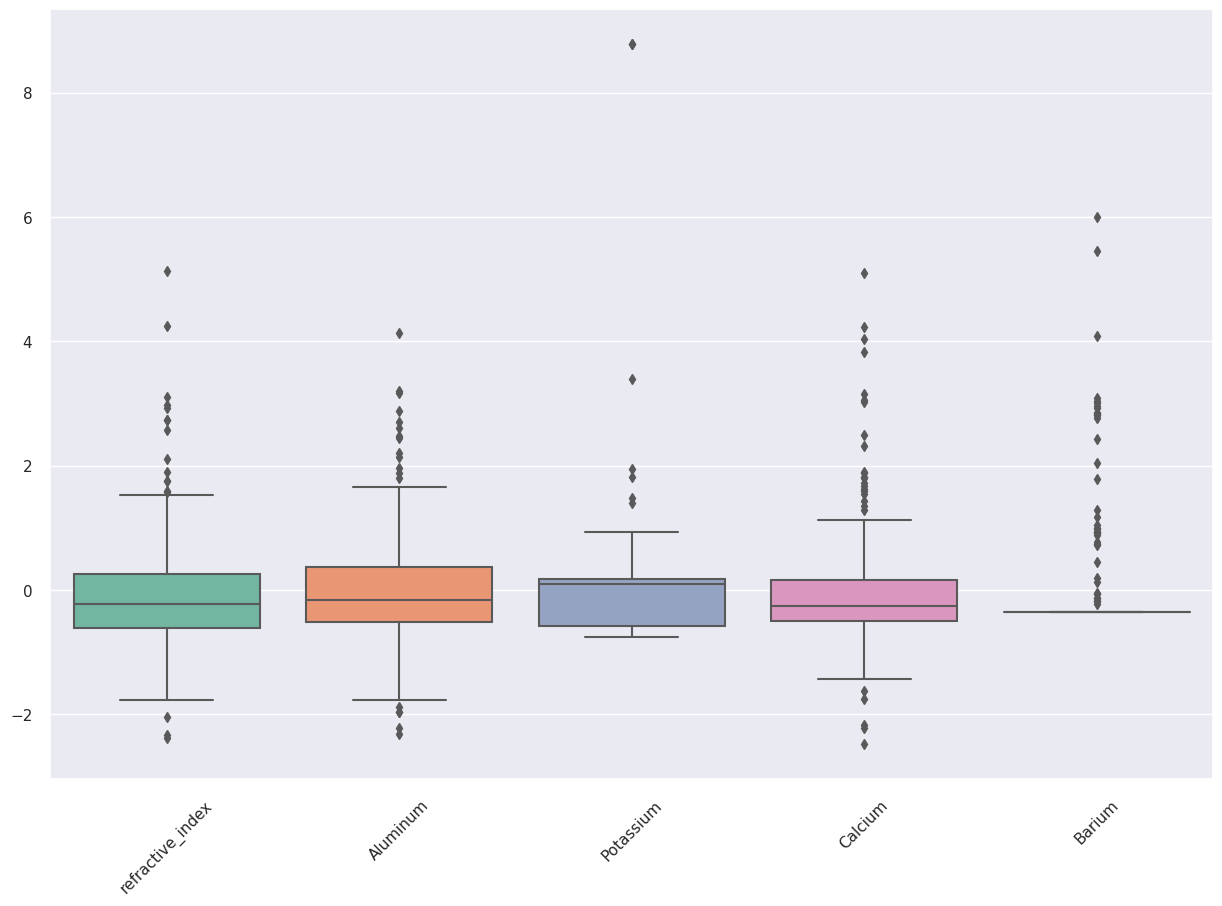

In [ ]:
ax = plt.figure(figsize=(15, 10))
ax = sns.boxplot(data=X, orient="v", palette="Set2", showfliers= True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

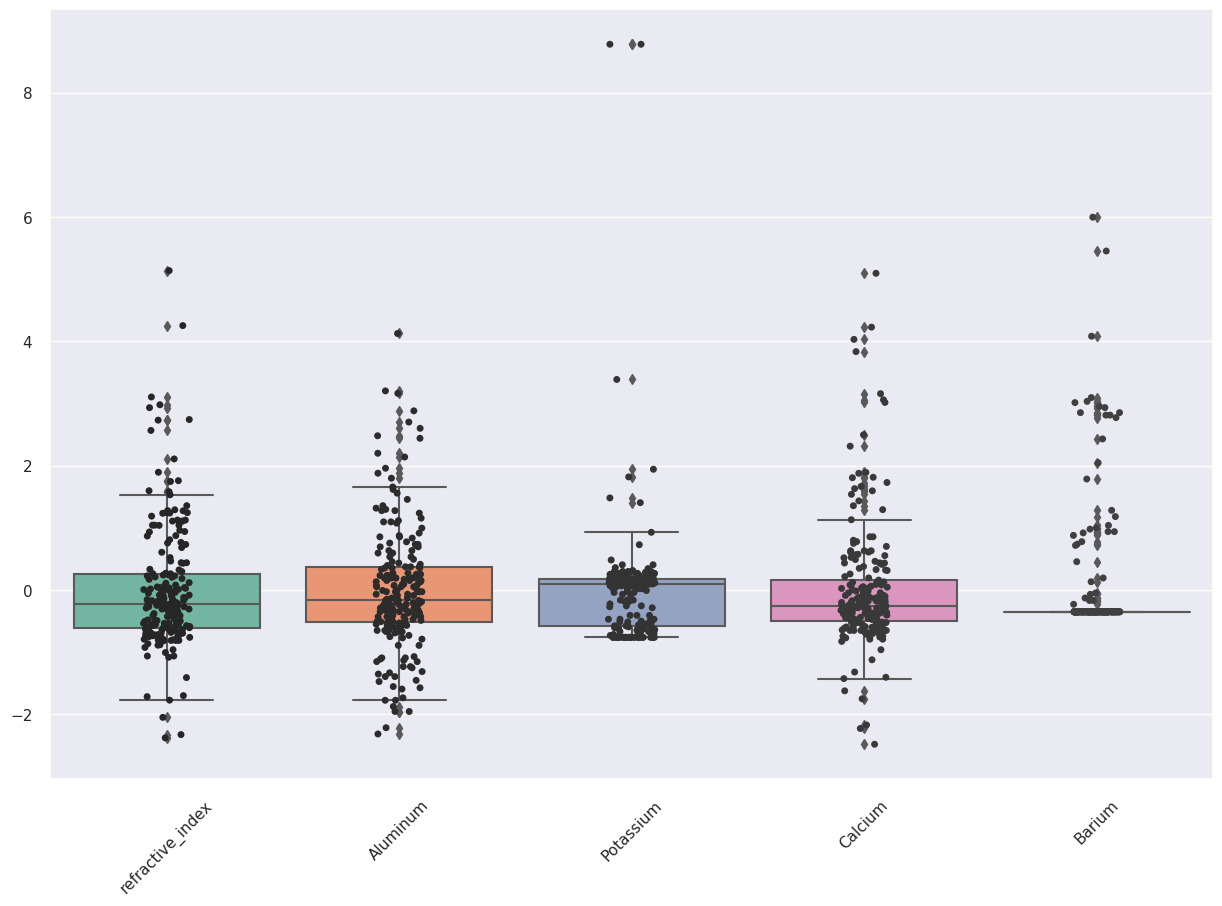

In [ ]:


# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

### Correlation Matrix

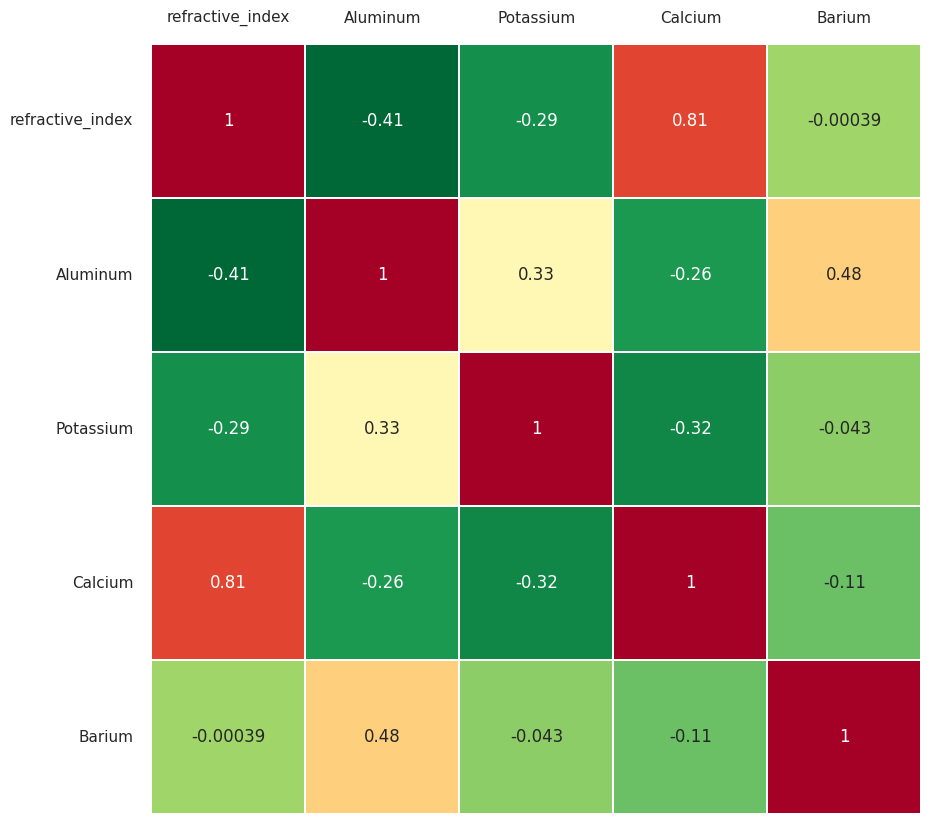

In [ ]:
ig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

## Principal Component Analysis (PCA)

Text(0, 0.5, 'Z2')

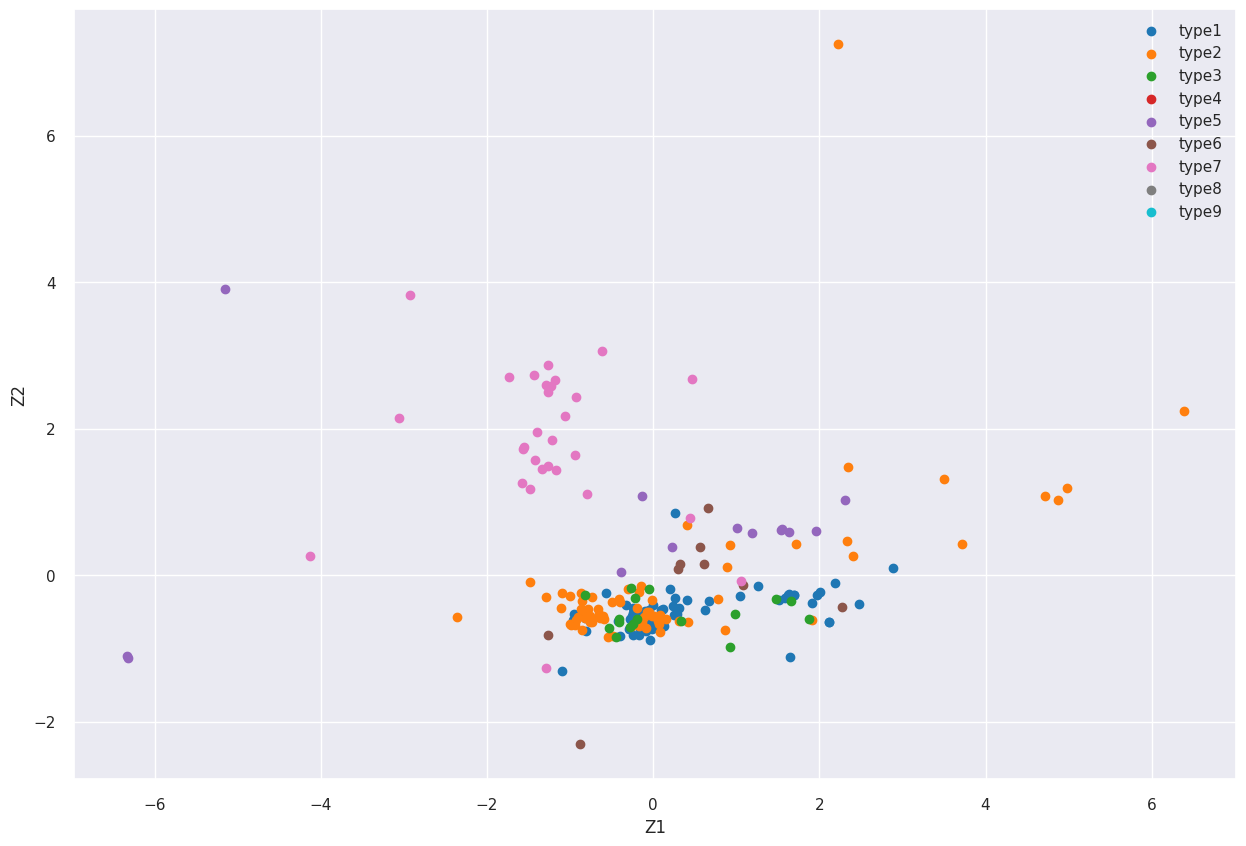

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

idx_type1 = np.where(y==1)
idx_type2 = np.where(y==2)
idx_type3 = np.where(y==3)
idx_type4 = np.where(y==4)
idx_type5 = np.where(y==5)
idx_type6 = np.where(y==6)
idx_type7 = np.where(y==7)
idx_type8 = np.where(y==8)
idx_type9 = np.where(y==9)

plt. figure(figsize=(15,10))
plt.scatter(Z[idx_type1,0], Z[idx_type1,1], c='#1f77b4', label='type1')
plt.scatter(Z[idx_type2,0], Z[idx_type2,1], c='#ff7f0e', label='type2')
plt.scatter(Z[idx_type3,0], Z[idx_type3,1], c='#2ca02c', label='type3')
plt.scatter(Z[idx_type4,0], Z[idx_type4,1], c='#d62728', label='type4')
plt.scatter(Z[idx_type5,0], Z[idx_type5,1], c='#9467bd', label='type5')
plt.scatter(Z[idx_type6,0], Z[idx_type6,1], c='#8c564b', label='type6')
plt.scatter(Z[idx_type7,0], Z[idx_type7,1], c='#e377c2', label='type7')
plt.scatter(Z[idx_type8,0], Z[idx_type8,1], c='#7f7f7f', label='type8')
plt.scatter(Z[idx_type9,0], Z[idx_type9,1], c='#17becf', label='type9')

plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

### Eigenvectors

array([[ 0.56480027,  0.2821746 ,  0.3078312 ,  0.24922007, -0.66671392],
       [-0.45239424,  0.47661338,  0.21381995, -0.64599262, -0.32427412],
       [-0.36637557, -0.17070767,  0.83809455,  0.34173124,  0.13207996],
       [ 0.5487886 ,  0.27177613,  0.35122505, -0.37053679,  0.60358286],
       [-0.20233667,  0.76825374, -0.18373749,  0.51624135,  0.26188062]])

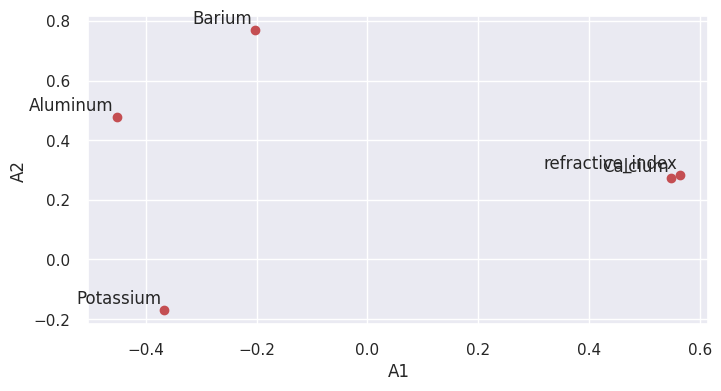

In [ ]:
A = pca.components_.T
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

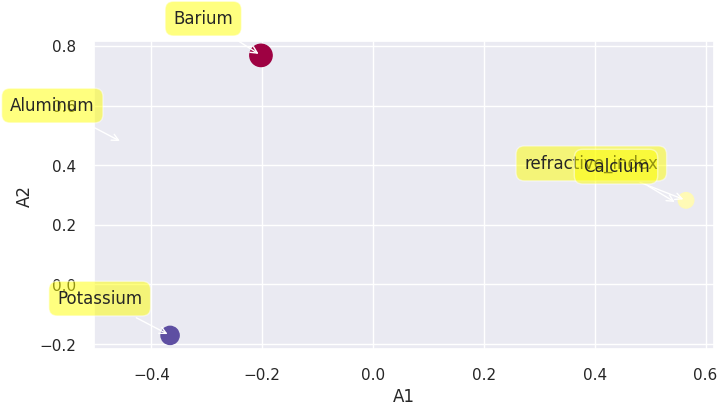

In [ ]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

### Scree plot

array([2.31264294, 1.27277232, 0.85685519, 0.45482363, 0.12638011])

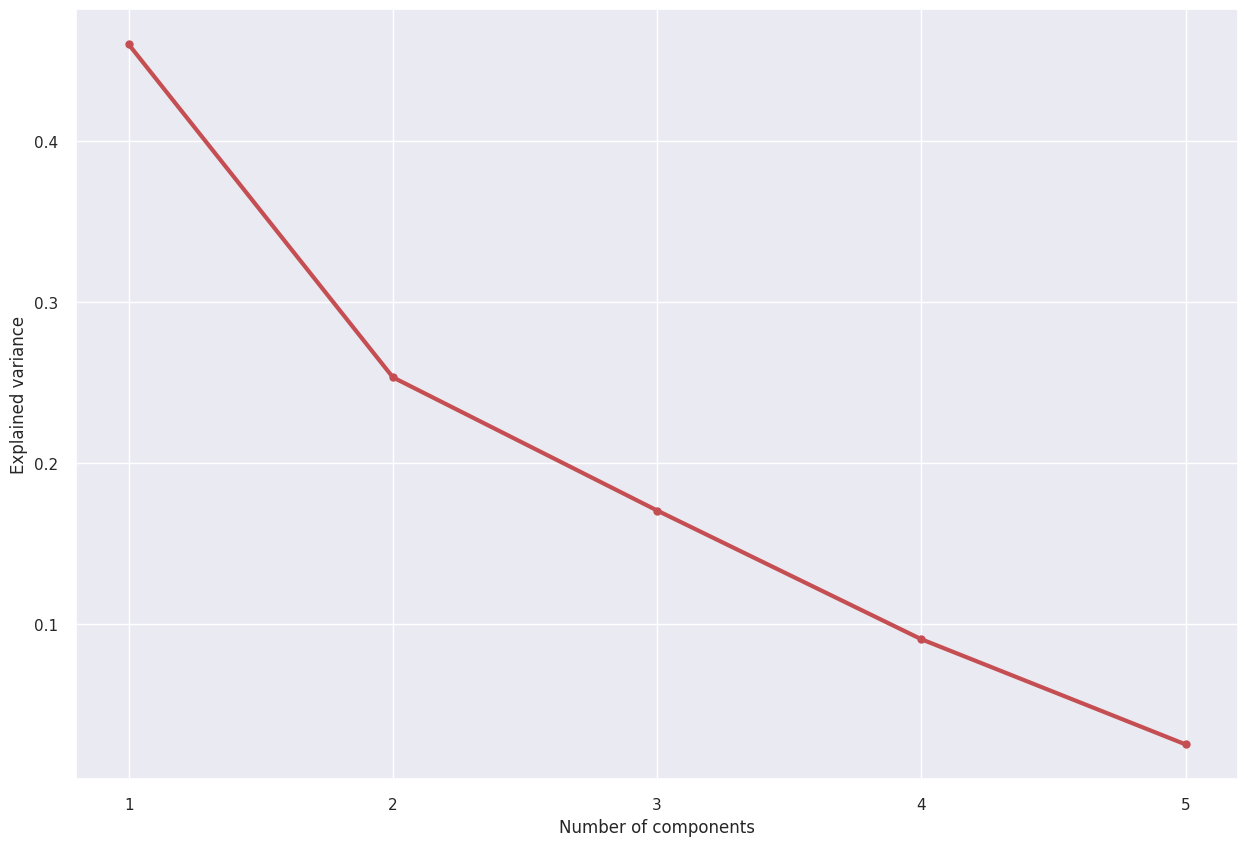

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

### Explained Variance

Text(0, 0.5, 'Cumulative explained variance')

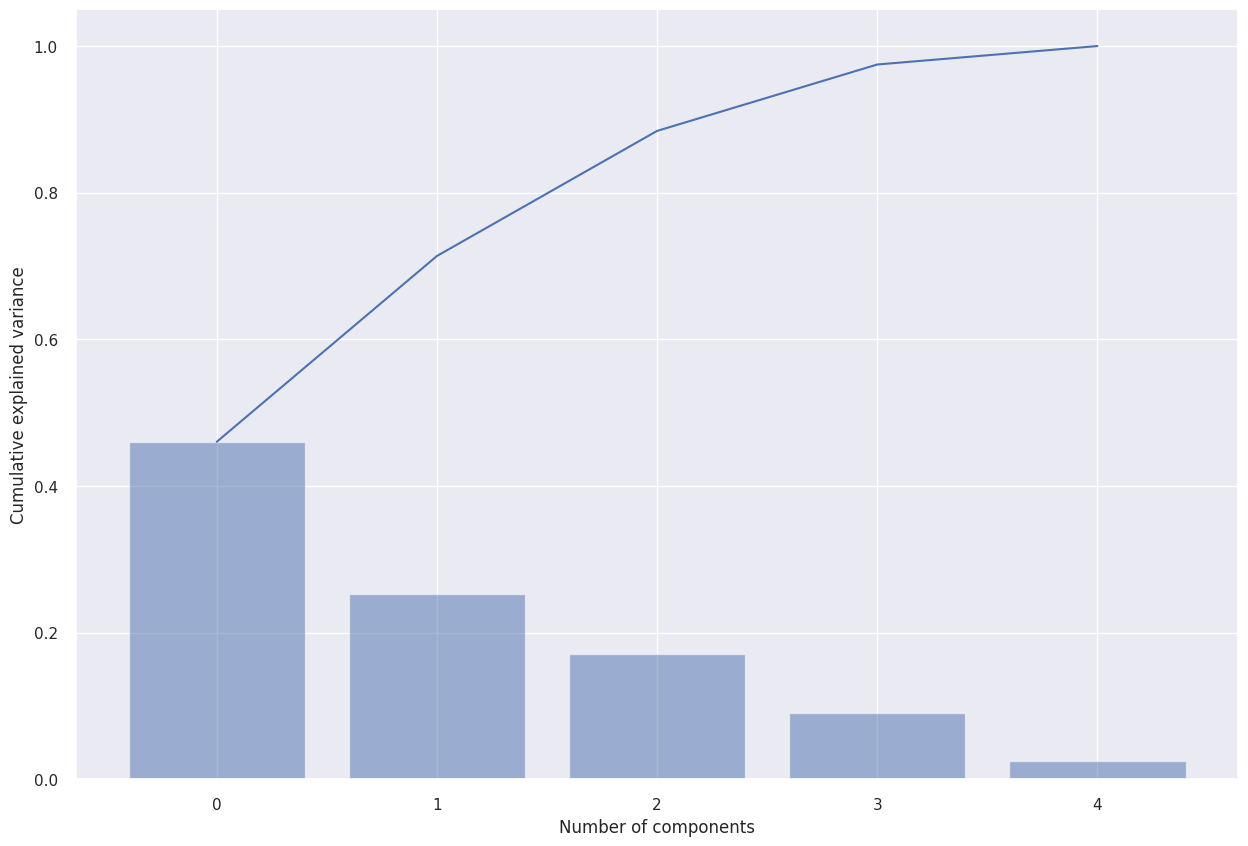

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

### Biplot

array([-0.27977549, -0.63394123, -0.58084711, -0.64522495, -0.73888529,
       -0.53486703, -0.82236911, -0.88035635, -0.40917524, -0.55403481,
       -0.61960462, -0.60994572, -0.76884173, -0.64262912, -0.57790909,
       -0.67737622, -0.67146749, -0.3392845 , -0.35338378, -0.24137069,
       -0.40345921, -1.12483839, -0.58653307, -0.54407778, -0.76346477,
       -0.68528631, -0.47030551, -0.60604022, -0.44814905, -0.59421799,
       -0.55432281, -0.74065876, -0.50028246, -0.51591876, -0.48009904,
       -0.83749205, -0.19004348, -0.48925579, -0.63444388, -0.63444388,
       -0.69583146, -0.66643982, -0.52926662, -0.38122394, -0.63203769,
       -0.30846231, -0.53778782,  0.08949822, -0.2380457 , -0.45286984,
       -0.39747513, -0.33754732, -0.54150093, -0.42071802, -0.4651751 ,
       -0.47901849, -1.30929503, -0.55888059, -0.81284028, -0.74251625,
       -0.47182465,  0.85281139, -0.31754202, -0.2729494 , -0.27188785,
       -0.14595178, -0.2759044 , -0.2759044 , -0.26343541, -0.10

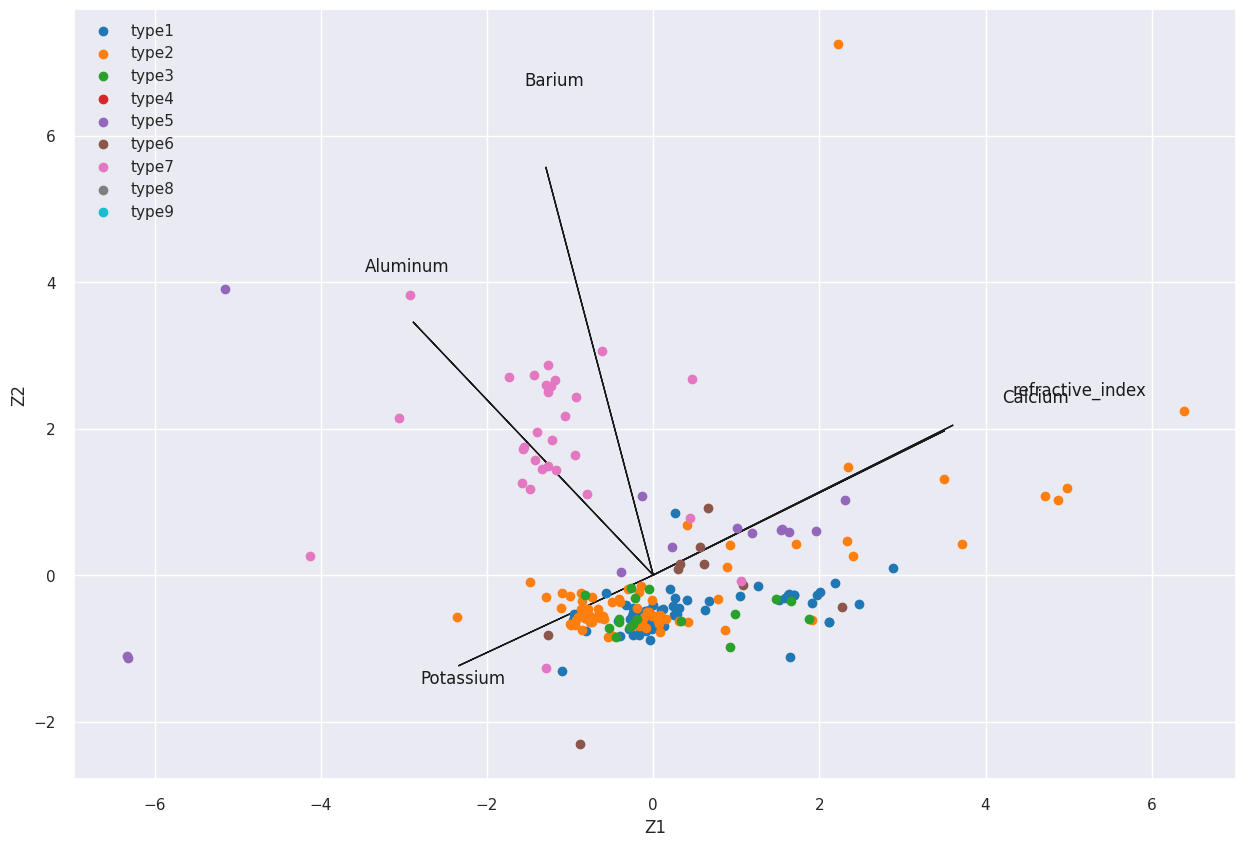

In [ ]:
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_type1,0], Z[idx_type1,1], c='#1f77b4', label='type1')
plt.scatter(Z[idx_type2,0], Z[idx_type2,1], c='#ff7f0e', label='type2')
plt.scatter(Z[idx_type3,0], Z[idx_type3,1], c='#2ca02c', label='type3')
plt.scatter(Z[idx_type4,0], Z[idx_type4,1], c='#d62728', label='type4')
plt.scatter(Z[idx_type5,0], Z[idx_type5,1], c='#9467bd', label='type5')
plt.scatter(Z[idx_type6,0], Z[idx_type6,1], c='#8c564b', label='type6')
plt.scatter(Z[idx_type7,0], Z[idx_type7,1], c='#e377c2', label='type7')
plt.scatter(Z[idx_type8,0], Z[idx_type8,1], c='#7f7f7f', label='type8')
plt.scatter(Z[idx_type9,0], Z[idx_type9,1], c='#17becf', label='type9')

plt.legend(loc='upper left')
Z1
Z2

## Using PCA Library

In [ ]:
!pip install pca

In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [ ]:
out['PC']

,PC1,PC2,PC3,PC4
0,1.043754,-0.279775,-0.428675,0.307148
1,-0.418297,-0.633941,-0.349112,0.150957
2,-0.817005,-0.580847,-0.545429,-0.234334
3,-0.245334,-0.645225,-0.161681,0.191342
4,-0.291379,-0.738885,-0.270396,0.265088
...,...,...,...,...
209,-1.741405,2.696960,-0.410724,-1.393122
210,-1.290116,2.595607,-1.222085,0.525236
211,-0.613911,3.063316,-0.831743,0.840503
212,-1.269007,2.500437,-1.250896,0.520422


### Scatter plot

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '4 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (46.0% expl.var)', ylabel='PC2 (25.3% expl.var)'>)

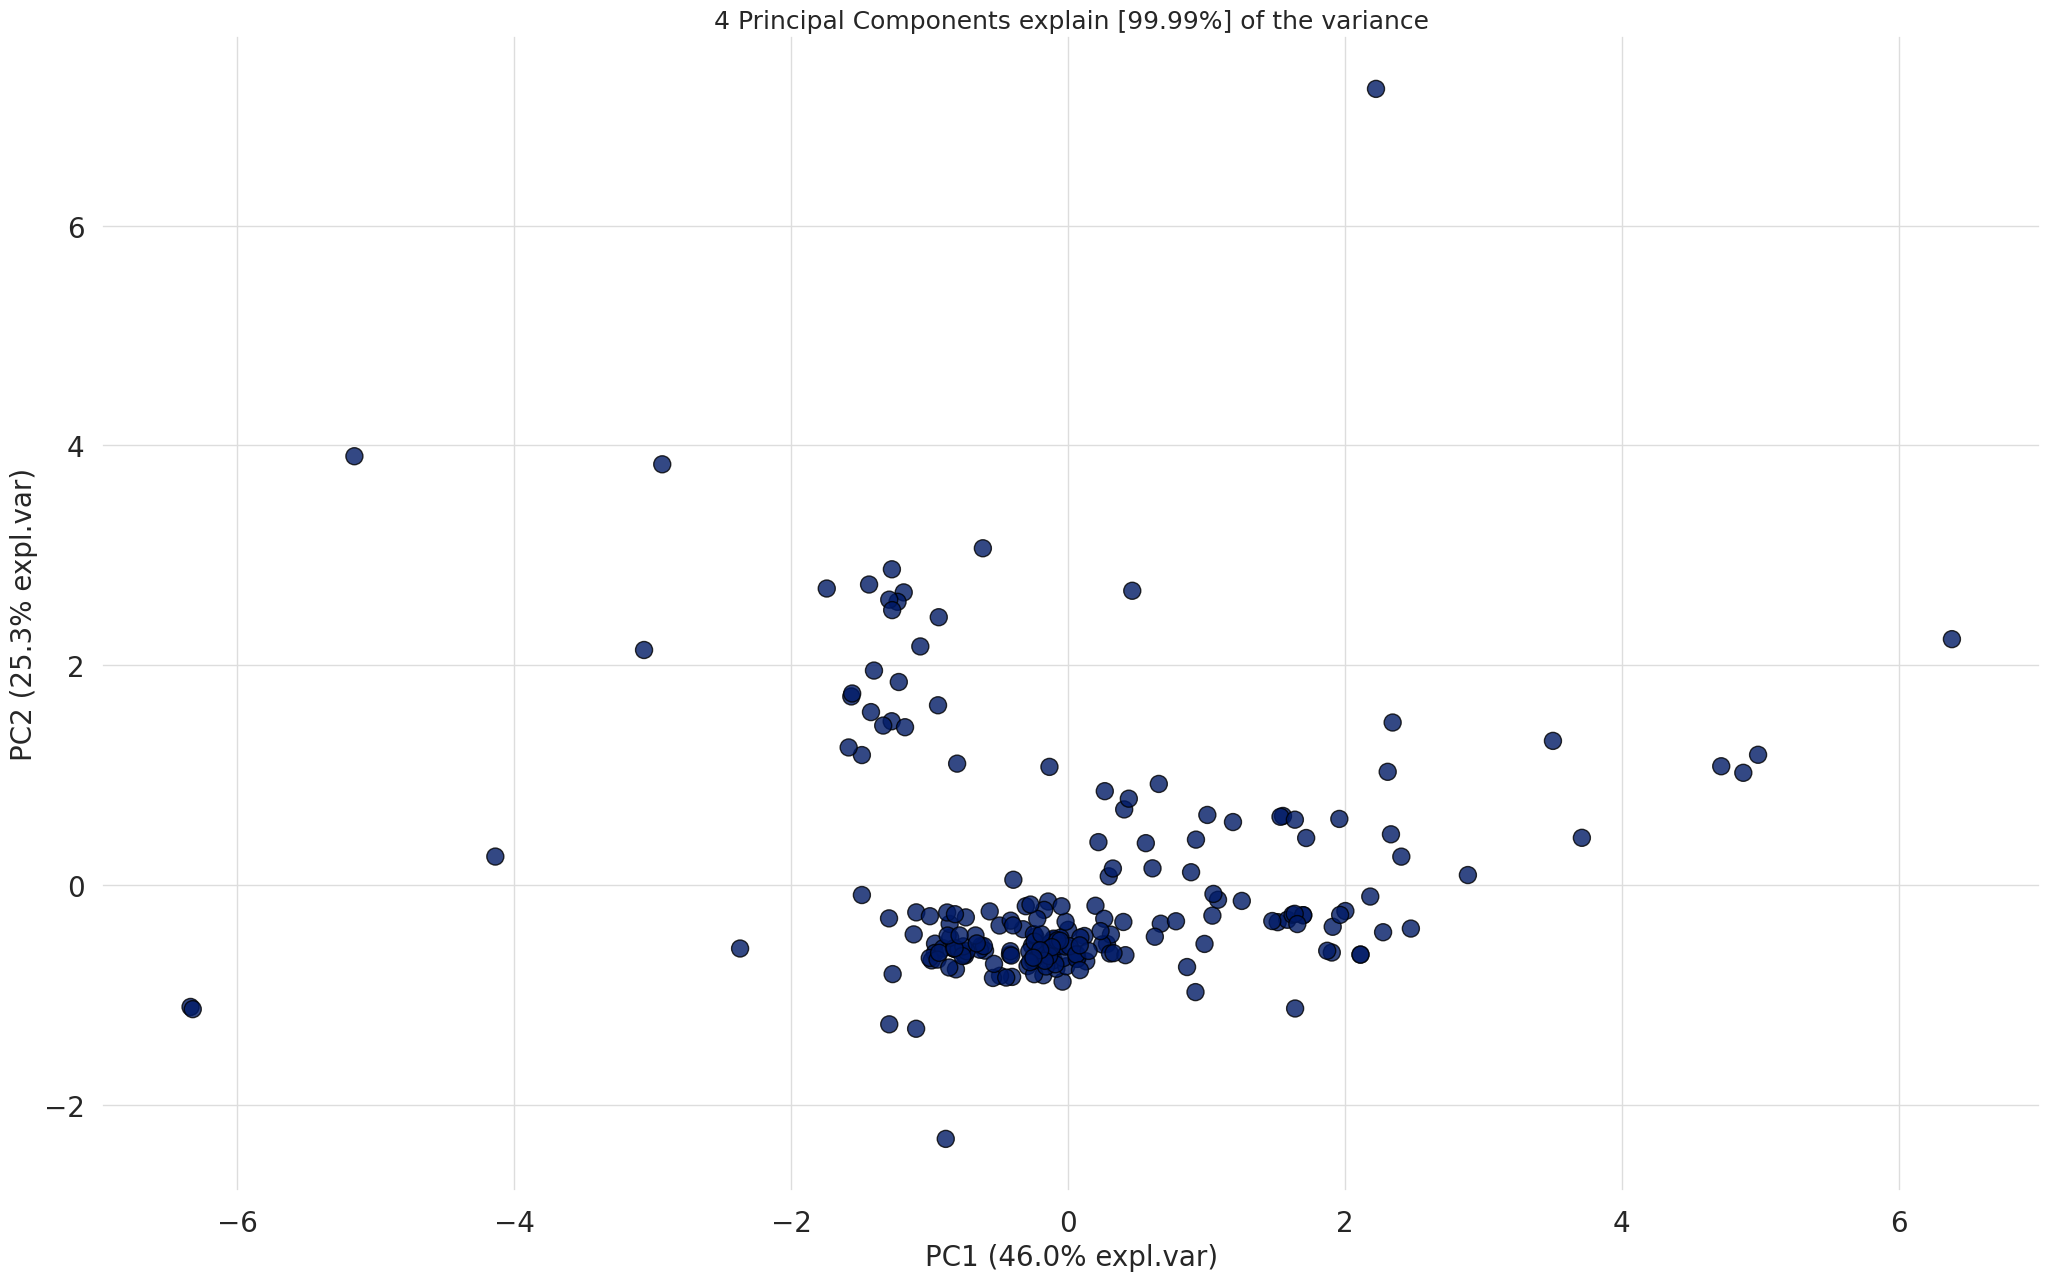

In [ ]:
model.scatter(label=True, legend=False)

### Eigenvectors

In [ ]:
A = out['loadings'].T
A


,PC1,PC2,PC3,PC4
refractive_index,0.564800,0.282175,0.307831,0.249220
Aluminum,-0.452394,0.476613,0.213820,-0.645993
Potassium,-0.366376,-0.170708,0.838095,0.341731
Calcium,0.548789,0.271776,0.351225,-0.370537
Barium,-0.202337,0.768254,-0.183737,0.516241


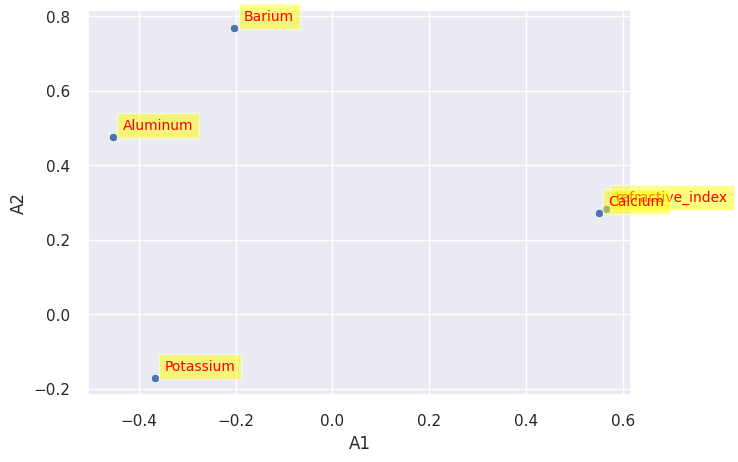

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A1')
plt.ylabel('A2')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

### Scree Plot

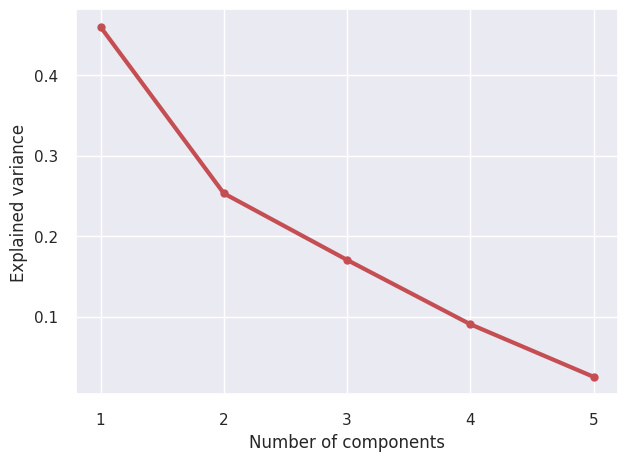

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

### Explained Variance Plot

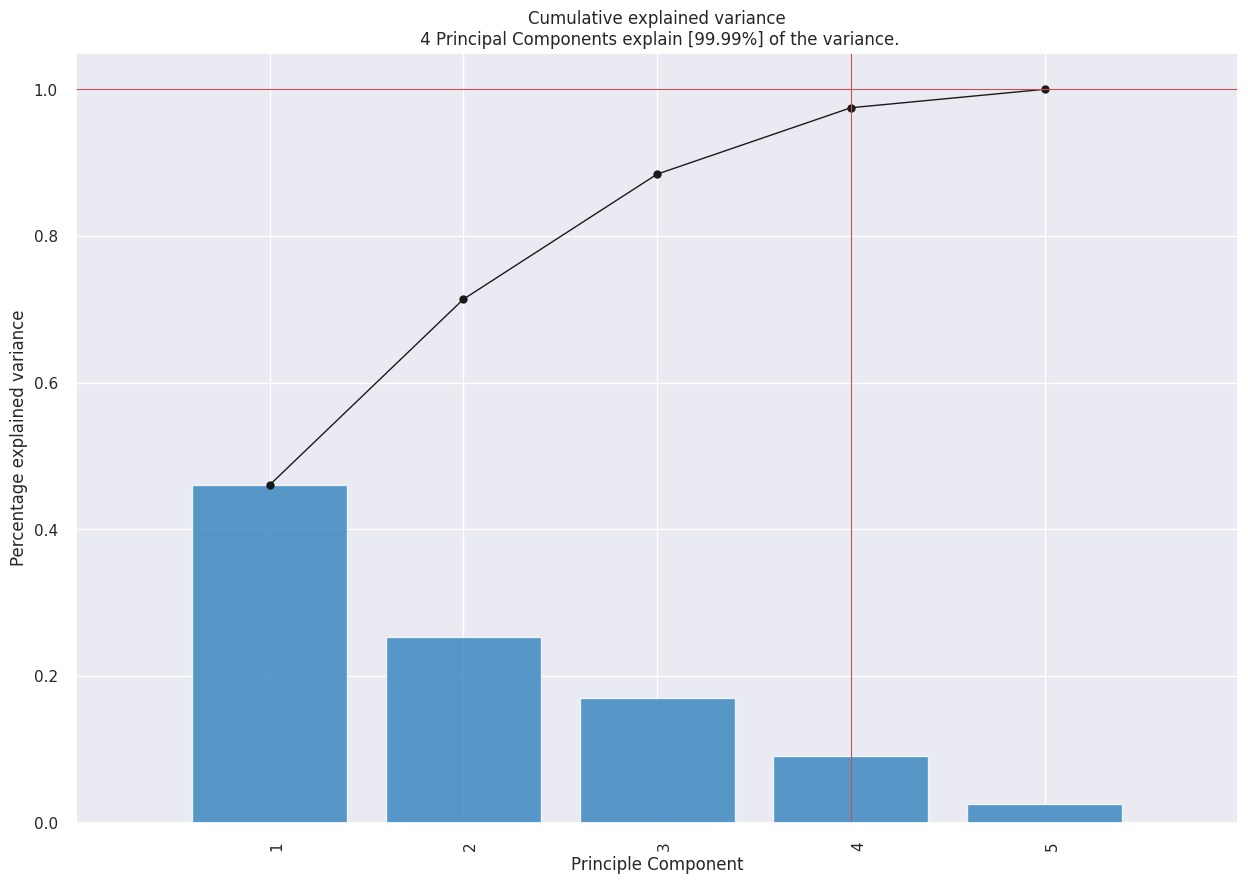

In [ ]:
model.plot();

### Biplot

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '4 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (46.0% expl.var)', ylabel='PC2 (25.3% expl.var)'>)

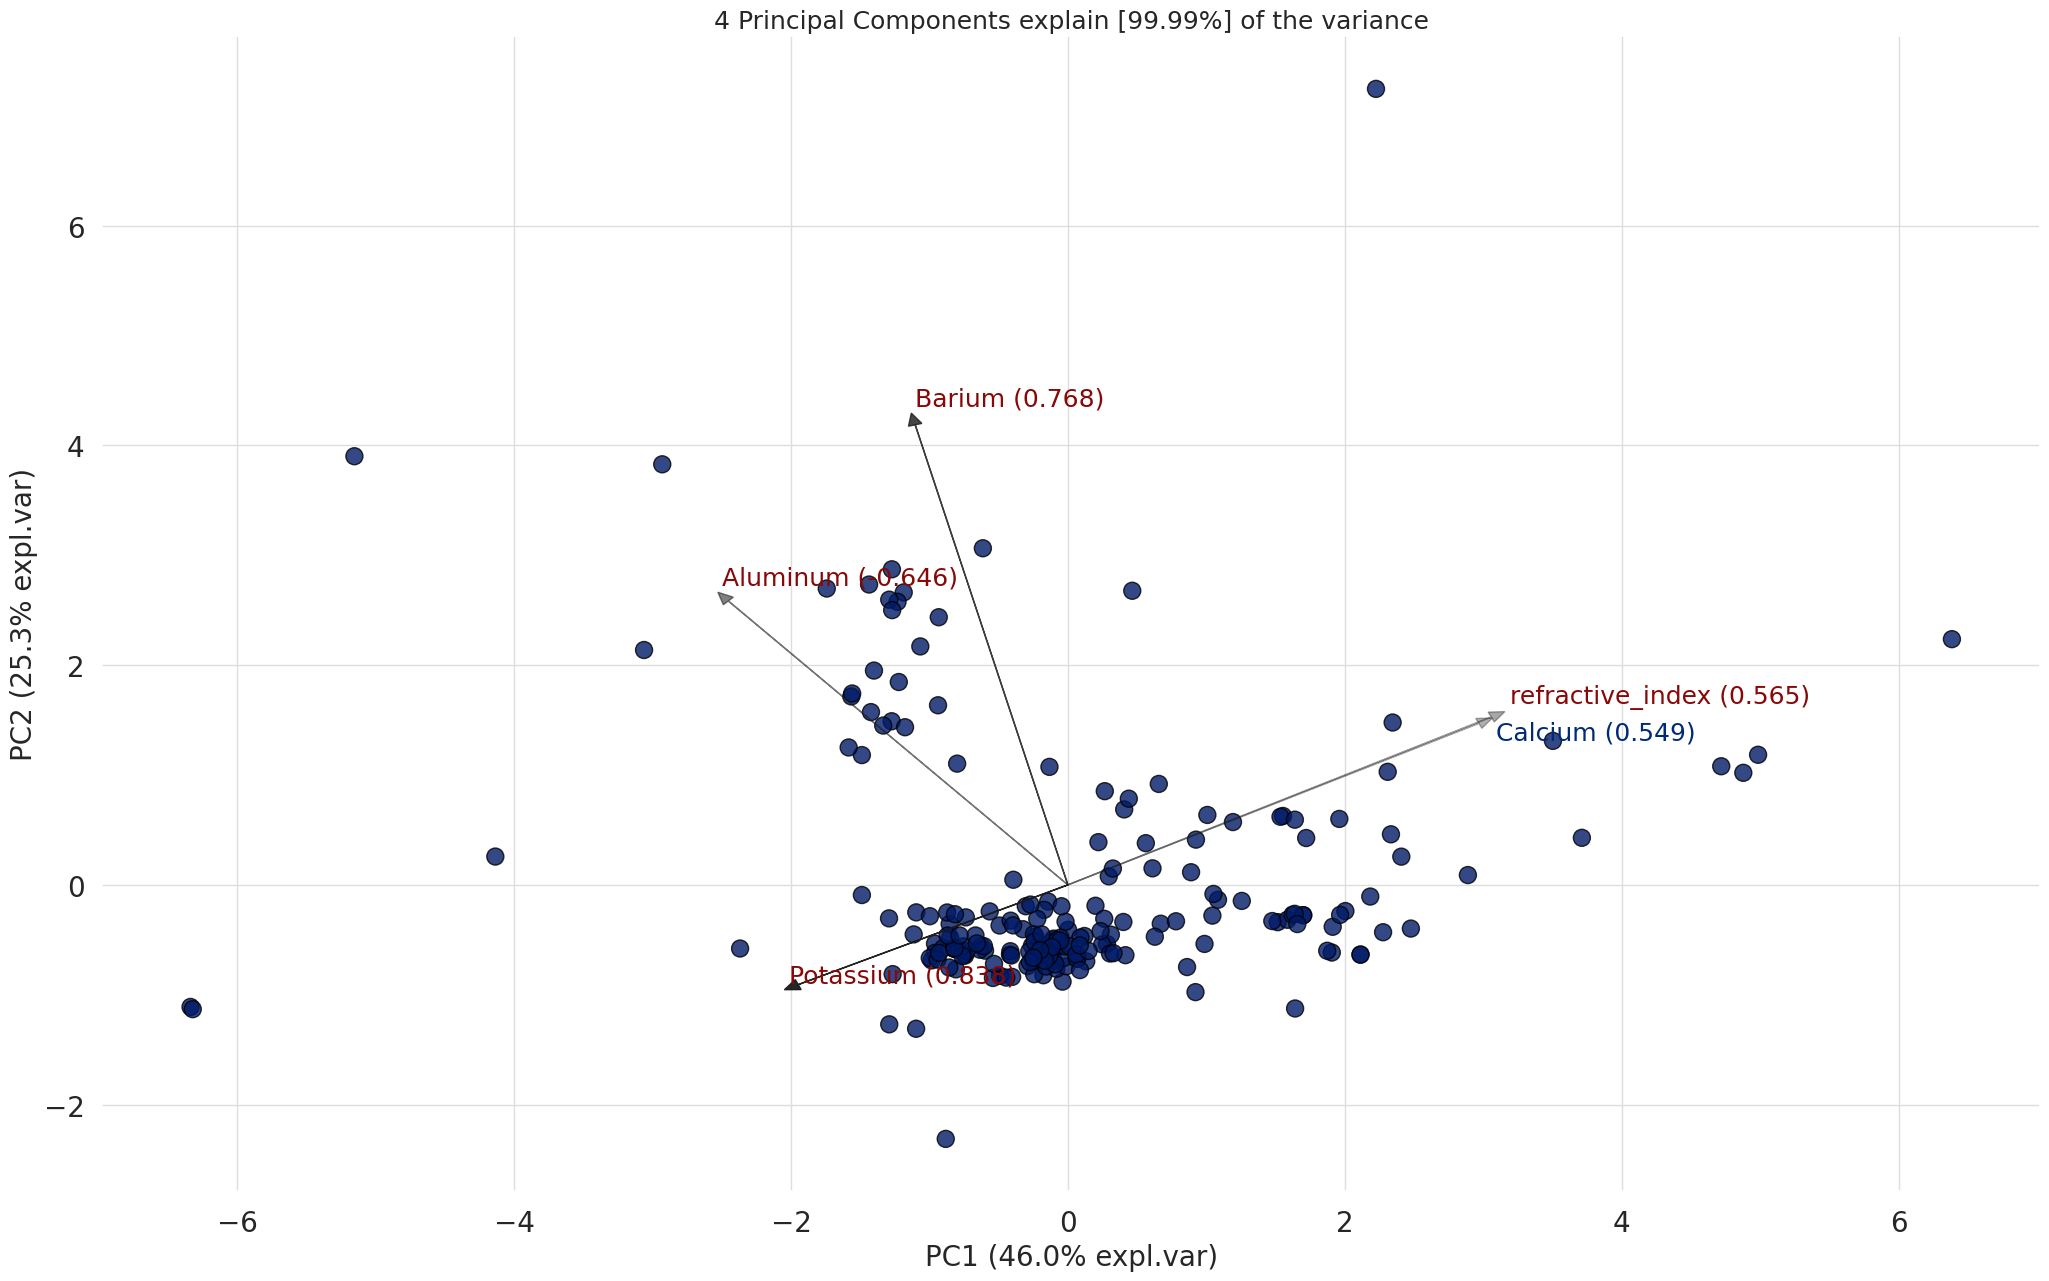

In [ ]:
model.biplot(label=False, legend=False, color_arrow='k')

## Classification using Pycaret

At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found. Before applying PCA, the output from compare_models() function shows that Linear Discriminant Analayis, Extra Trees Classifier, and Gradient Boosting Classifier shows the best performance.

However, after applying PCA, the these models performance decreases and Logistic Regression, K-nearest neighbour, and Quadratic Discriminant Analysis shows the highest performance. Therefore, I have taken Logistic Regression, K-nearest Neighbour and Quadratic discriminant Analysis as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA.

In [ ]:
!pip install pycaret

In [ ]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.2.0'

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (193, 6)
Unseen Data For Predictions: (21, 6)


In [ ]:
!pip install scipy

In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='glass_type', train_size=0.7, session_id=123)

,Description,Value
0,Session id,123
1,Target,glass_type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 5: 3, 6: 4, 7: 5"
4,Original data shape,"(193, 6)"
5,Transformed data shape,"(193, 6)"
6,Transformed train set shape,"(135, 6)"
7,Transformed test set shape,"(58, 6)"
8,Numeric features,5
9,Preprocess,True


### Comparing All Models

In [ ]:
#show the best model and their statistics
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7467,0.4453,0.7467,0.7179,0.7212,0.6468,0.6592,0.5120
rf,Random Forest Classifier,0.7324,0.4537,0.7324,0.7059,0.7066,0.6290,0.6413,0.4320
lightgbm,Light Gradient Boosting Machine,0.7247,0.4484,0.7247,0.6946,0.7017,0.6109,0.6219,0.9070
xgboost,Extreme Gradient Boosting,0.6956,0.4391,0.6956,0.6696,0.6692,0.5698,0.5850,0.2520
gbc,Gradient Boosting Classifier,0.6720,0.4475,0.6720,0.6339,0.6432,0.5371,0.5482,1.2200
dt,Decision Tree Classifier,0.6577,0.3853,0.6577,0.6777,0.6459,0.5369,0.5546,0.1000
lda,Linear Discriminant Analysis,0.5934,0.4013,0.5934,0.5455,0.5579,0.4259,0.4398,0.0690
knn,K Neighbors Classifier,0.5918,0.3921,0.5918,0.5398,0.5451,0.4148,0.4377,0.0690
ridge,Ridge Classifier,0.5846,0.0000,0.5846,0.4917,0.5230,0.3972,0.4192,0.0510
lr,Logistic Regression,0.5489,0.4051,0.5489,0.4755,0.5001,0.3411,0.3569,0.1300


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

#### Extra trees classigier

In [ ]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.8819,0.8571,0.8265,0.8294,0.7971,0.8159
1,0.8571,0.8603,0.8571,0.7976,0.8247,0.8056,0.8117
2,0.7143,0.9628,0.7143,0.6095,0.6566,0.6028,0.6128
3,0.6429,0.9068,0.6429,0.6071,0.6190,0.5270,0.5306
4,0.8571,0.0000,0.8571,0.7551,0.7976,0.8000,0.8258
5,0.6154,0.8408,0.6154,0.5385,0.5692,0.4758,0.4890
6,0.6154,0.0000,0.6154,0.7821,0.6464,0.4800,0.5044
7,0.6923,0.0000,0.6923,0.6282,0.6573,0.5357,0.5411
8,0.9231,0.0000,0.9231,0.9359,0.9223,0.8879,0.8957


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

#### Tune the model

In [ ]:
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.8388,0.7143,0.7976,0.6954,0.6267,0.6528
1,0.7143,0.8788,0.7143,0.6893,0.6905,0.6242,0.6327
2,0.6429,0.8653,0.6429,0.7857,0.6612,0.5455,0.5714
3,0.6429,0.9302,0.6429,0.7024,0.6440,0.5484,0.5594
4,0.7143,0.0000,0.7143,0.6095,0.6566,0.6000,0.6097
5,0.7692,0.8825,0.7692,0.7821,0.7656,0.7068,0.7122
6,0.5385,0.0000,0.5385,0.7692,0.6044,0.4000,0.4235
7,0.6923,0.0000,0.6923,0.8333,0.7046,0.5840,0.6136
8,0.6923,0.0000,0.6923,0.7564,0.6964,0.5667,0.5812


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [ ]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Classification + PCA

In [ ]:
clf_pca = setup(data=data, target='glass_type', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 2)

,Description,Value
0,Session id,123
1,Target,glass_type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 5: 3, 6: 4, 7: 5"
4,Original data shape,"(193, 6)"
5,Transformed data shape,"(193, 3)"
6,Transformed train set shape,"(135, 3)"
7,Transformed test set shape,"(58, 3)"
8,Numeric features,5
9,Preprocess,True


## Comparing Models

In [ ]:
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6066,0.3961,0.6066,0.5509,0.5686,0.4391,0.4527,0.0610
et,Extra Trees Classifier,0.5989,0.4017,0.5989,0.5812,0.5753,0.4397,0.4536,0.1910
xgboost,Extreme Gradient Boosting,0.5775,0.3981,0.5775,0.5709,0.5601,0.4119,0.4246,0.1140
lightgbm,Light Gradient Boosting Machine,0.5621,0.3976,0.5621,0.5451,0.5433,0.3918,0.4032,0.1550
lr,Logistic Regression,0.5549,0.3465,0.5549,0.4711,0.5018,0.3432,0.3598,0.0540
gbc,Gradient Boosting Classifier,0.5456,0.3725,0.5456,0.5193,0.5211,0.3685,0.3803,0.6590
dt,Decision Tree Classifier,0.5407,0.3369,0.5407,0.5373,0.5312,0.3729,0.3792,0.0430
rf,Random Forest Classifier,0.5401,0.4138,0.5401,0.5253,0.5244,0.3656,0.3747,0.2240
lda,Linear Discriminant Analysis,0.5187,0.3707,0.5187,0.4532,0.4629,0.2841,0.3116,0.0460
ridge,Ridge Classifier,0.5176,0.0000,0.5176,0.4346,0.4663,0.2822,0.2947,0.0430


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

## Best model with PCA


In [ ]:
best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

## Tune Best Model

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.7933,0.7143,0.7551,0.7083,0.6056,0.6235
1,0.5714,0.8275,0.5714,0.4796,0.5130,0.3957,0.4162
2,0.5714,0.7469,0.5714,0.4847,0.5094,0.4126,0.4321
3,0.6429,0.8461,0.6429,0.5643,0.5996,0.5035,0.5119
4,0.6429,0.0000,0.6429,0.5204,0.5649,0.4964,0.5257
5,0.4615,0.6239,0.4615,0.4103,0.4308,0.2661,0.2735
6,0.3846,0.0000,0.3846,0.4231,0.4017,0.1405,0.1429
7,0.6923,0.0000,0.6923,0.6850,0.6667,0.5517,0.5718
8,0.6923,0.0000,0.6923,0.6401,0.6538,0.5398,0.5608


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


## Evaluate Best Model

In [ ]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Explainable AI with Shapley values

For binary classification, AI shapley can only support tree based classification models. as Light Gradient Boosting Machine is a tree based model we use it for shapley values.

In [ ]:
et_pca = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.8217,0.7143,0.7619,0.7116,0.6164,0.6294
1,0.5000,0.7952,0.5000,0.4439,0.4574,0.3147,0.3295
2,0.5714,0.8693,0.5714,0.5286,0.5476,0.4207,0.4268
3,0.7143,0.8732,0.7143,0.6327,0.6667,0.6000,0.6151
4,0.6429,0.0000,0.6429,0.5184,0.5714,0.4891,0.5105
5,0.4615,0.6571,0.4615,0.3956,0.4196,0.2479,0.2631
6,0.4615,0.0000,0.4615,0.4615,0.4615,0.2222,0.2261
7,0.6154,0.0000,0.6154,0.6731,0.6410,0.4583,0.4623
8,0.7692,0.0000,0.7692,0.7170,0.7308,0.6518,0.6711


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_et_pca = tune_model(et_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.8144,0.5000,0.4031,0.4448,0.2462,0.2560
1,0.4286,0.8161,0.4286,0.3912,0.3881,0.1704,0.1803
2,0.5000,0.8158,0.5000,0.4482,0.4505,0.2687,0.2874
3,0.5000,0.9001,0.5000,0.4102,0.4484,0.2847,0.2951
4,0.5714,0.0000,0.5714,0.4921,0.5102,0.3778,0.4179
5,0.3846,0.7158,0.3846,0.2564,0.2959,0.1111,0.1344
6,0.3846,0.0000,0.3846,0.4006,0.3698,0.0714,0.0774
7,0.5385,0.0000,0.5385,0.4725,0.5000,0.2778,0.2873
8,0.6923,0.0000,0.6923,0.6752,0.6401,0.5185,0.5887


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [ ]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
!pip install shap

In [ ]:
knn = create_model('knn')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7857,0.8526,0.7857,0.7194,0.7341,0.6957,0.7177
1,0.6429,0.8288,0.6429,0.6250,0.6238,0.5205,0.5318
2,0.5714,0.7458,0.5714,0.4847,0.5094,0.4126,0.4321
3,0.6429,0.8530,0.6429,0.6000,0.6190,0.5172,0.5210
4,0.5000,0.0000,0.5000,0.4167,0.4519,0.2899,0.3022
5,0.4615,0.6806,0.4615,0.4103,0.4308,0.2661,0.2735
6,0.4615,0.0000,0.4615,0.4487,0.4507,0.2155,0.2193
7,0.6923,0.0000,0.6923,0.6506,0.6420,0.5357,0.5746
8,0.6923,0.0000,0.6923,0.5897,0.6364,0.5185,0.5307


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_knn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.7933,0.7143,0.7551,0.7083,0.6056,0.6235
1,0.5714,0.8275,0.5714,0.4796,0.5130,0.3957,0.4162
2,0.5714,0.7469,0.5714,0.4847,0.5094,0.4126,0.4321
3,0.6429,0.8461,0.6429,0.5643,0.5996,0.5035,0.5119
4,0.6429,0.0000,0.6429,0.5204,0.5649,0.4964,0.5257
5,0.4615,0.6239,0.4615,0.4103,0.4308,0.2661,0.2735
6,0.3846,0.0000,0.3846,0.4231,0.4017,0.1405,0.1429
7,0.6923,0.0000,0.6923,0.6850,0.6667,0.5517,0.5718
8,0.6923,0.0000,0.6923,0.6401,0.6538,0.5398,0.5608


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_knn


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
import shap

In [ ]:
qda=create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.7888,0.5000,0.3690,0.3988,0.2462,0.2896
1,0.5000,0.7269,0.5000,0.3889,0.4080,0.3050,0.3500
2,0.4286,0.6960,0.4286,0.2468,0.2952,0.2168,0.3046
3,0.4286,0.6495,0.4286,0.4048,0.3965,0.1942,0.2009
4,0.4286,0.0000,0.4286,0.2468,0.2952,0.2168,0.3066
5,0.6154,0.7009,0.6154,0.5128,0.5348,0.4628,0.5121
6,0.4615,0.0000,0.4615,0.4533,0.4487,0.1875,0.1950
7,0.4615,0.0000,0.4615,0.2517,0.3173,0.1574,0.2327
8,0.5385,0.0000,0.5385,0.4615,0.4432,0.2778,0.3482


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_qda=tune_model(qda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6429,0.6593,0.6429,0.5089,0.5604,0.4615,0.4891
1,0.5714,0.7344,0.5714,0.4612,0.5079,0.3869,0.4011
2,0.5714,0.7115,0.5714,0.4864,0.5024,0.3778,0.3997
3,0.5714,0.7405,0.5714,0.4643,0.5091,0.3913,0.4052
4,0.6429,0.0000,0.6429,0.5119,0.5662,0.4928,0.5137
5,0.6154,0.7265,0.6154,0.4923,0.5436,0.4628,0.4816
6,0.3077,0.0000,0.3077,0.2821,0.2937,-0.0446,-0.0455
7,0.6154,0.0000,0.6154,0.5096,0.5437,0.3981,0.4256
8,0.6923,0.0000,0.6923,0.6058,0.6292,0.5185,0.5543


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_qda

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.83,
                              store_covariance=False, tol=0.0001)

In [ ]:
evaluate_model(tuned_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
!pip install statsmodels --upgrade

In [ ]:
clf_pca = setup(data=data, target='glass_type', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 2)

,Description,Value
0,Session id,123
1,Target,glass_type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 5: 3, 6: 4, 7: 5"
4,Original data shape,"(193, 6)"
5,Transformed data shape,"(193, 3)"
6,Transformed train set shape,"(135, 3)"
7,Transformed test set shape,"(58, 3)"
8,Numeric features,5
9,Preprocess,True


In [ ]:

#show the best model and their statistics
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6066,0.3961,0.6066,0.5509,0.5686,0.4391,0.4527,0.1830
et,Extra Trees Classifier,0.5989,0.4017,0.5989,0.5812,0.5753,0.4397,0.4536,0.4130
xgboost,Extreme Gradient Boosting,0.5775,0.3981,0.5775,0.5709,0.5601,0.4119,0.4246,0.1850
lightgbm,Light Gradient Boosting Machine,0.5621,0.3976,0.5621,0.5451,0.5433,0.3918,0.4032,0.3590
lr,Logistic Regression,0.5549,0.3465,0.5549,0.4711,0.5018,0.3432,0.3598,1.5000
gbc,Gradient Boosting Classifier,0.5456,0.3725,0.5456,0.5193,0.5211,0.3685,0.3803,0.8040
dt,Decision Tree Classifier,0.5407,0.3369,0.5407,0.5373,0.5312,0.3729,0.3792,0.0730
rf,Random Forest Classifier,0.5401,0.4138,0.5401,0.5253,0.5244,0.3656,0.3747,0.4380
lda,Linear Discriminant Analysis,0.5187,0.3707,0.5187,0.4532,0.4629,0.2841,0.3116,0.0910
ridge,Ridge Classifier,0.5176,0.0000,0.5176,0.4346,0.4663,0.2822,0.2947,0.0870


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.7933,0.7143,0.7551,0.7083,0.6056,0.6235
1,0.5714,0.8275,0.5714,0.4796,0.5130,0.3957,0.4162
2,0.5714,0.7469,0.5714,0.4847,0.5094,0.4126,0.4321
3,0.6429,0.8461,0.6429,0.5643,0.5996,0.5035,0.5119
4,0.6429,0.0000,0.6429,0.5204,0.5649,0.4964,0.5257
5,0.4615,0.6239,0.4615,0.4103,0.4308,0.2661,0.2735
6,0.3846,0.0000,0.3846,0.4231,0.4017,0.1405,0.1429
7,0.6923,0.0000,0.6923,0.6850,0.6667,0.5517,0.5718
8,0.6923,0.0000,0.6923,0.6401,0.6538,0.5398,0.5608


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
lr_pca = create_model('lr')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5714,0.6783,0.5714,0.4643,0.5055,0.3538,0.3749
1,0.5000,0.7614,0.5000,0.3968,0.4286,0.2741,0.3011
2,0.5000,0.6969,0.5000,0.4439,0.4459,0.2794,0.2978
3,0.5714,0.6513,0.5714,0.4643,0.5091,0.3913,0.4052
4,0.7143,0.0000,0.7143,0.5714,0.6312,0.5942,0.6195
5,0.4615,0.6774,0.4615,0.3795,0.4137,0.2479,0.2580
6,0.3846,0.0000,0.3846,0.3590,0.3706,0.0714,0.0728
7,0.6154,0.0000,0.6154,0.5256,0.5664,0.3981,0.4075
8,0.6923,0.0000,0.6923,0.6058,0.6292,0.5185,0.5543


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_lr_pca = tune_model(lr_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5714,0.6947,0.5714,0.4643,0.5055,0.3538,0.3749
1,0.5000,0.7628,0.5000,0.3968,0.4286,0.2741,0.3011
2,0.5000,0.7214,0.5000,0.4439,0.4459,0.2794,0.2978
3,0.5714,0.6648,0.5714,0.4643,0.5091,0.3913,0.4052
4,0.7143,0.0000,0.7143,0.6095,0.6566,0.6000,0.6097
5,0.4615,0.6774,0.4615,0.3795,0.4137,0.2479,0.2580
6,0.3846,0.0000,0.3846,0.3590,0.3706,0.0714,0.0728
7,0.6154,0.0000,0.6154,0.5256,0.5664,0.3981,0.4075
8,0.6923,0.0000,0.6923,0.6058,0.6292,0.5185,0.5543


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_lr_pca


LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
evaluate_model(tuned_lr_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
knn_pca = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7857,0.8526,0.7857,0.7194,0.7341,0.6957,0.7177
1,0.6429,0.8288,0.6429,0.6250,0.6238,0.5205,0.5318
2,0.5714,0.7458,0.5714,0.4847,0.5094,0.4126,0.4321
3,0.6429,0.8530,0.6429,0.6000,0.6190,0.5172,0.5210
4,0.5000,0.0000,0.5000,0.4167,0.4519,0.2899,0.3022
5,0.4615,0.6806,0.4615,0.4103,0.4308,0.2661,0.2735
6,0.4615,0.0000,0.4615,0.4487,0.4507,0.2155,0.2193
7,0.6923,0.0000,0.6923,0.6506,0.6420,0.5357,0.5746
8,0.6923,0.0000,0.6923,0.5897,0.6364,0.5185,0.5307


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_knn_pca = tune_model(knn_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.7933,0.7143,0.7551,0.7083,0.6056,0.6235
1,0.5714,0.8275,0.5714,0.4796,0.5130,0.3957,0.4162
2,0.5714,0.7469,0.5714,0.4847,0.5094,0.4126,0.4321
3,0.6429,0.8461,0.6429,0.5643,0.5996,0.5035,0.5119
4,0.6429,0.0000,0.6429,0.5204,0.5649,0.4964,0.5257
5,0.4615,0.6239,0.4615,0.4103,0.4308,0.2661,0.2735
6,0.3846,0.0000,0.3846,0.4231,0.4017,0.1405,0.1429
7,0.6923,0.0000,0.6923,0.6850,0.6667,0.5517,0.5718
8,0.6923,0.0000,0.6923,0.6401,0.6538,0.5398,0.5608


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_knn_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
evaluate_model(tuned_knn_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
qda_pca = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.7888,0.5000,0.3690,0.3988,0.2462,0.2896
1,0.5000,0.7269,0.5000,0.3889,0.4080,0.3050,0.3500
2,0.4286,0.6960,0.4286,0.2468,0.2952,0.2168,0.3046
3,0.4286,0.6495,0.4286,0.4048,0.3965,0.1942,0.2009
4,0.4286,0.0000,0.4286,0.2468,0.2952,0.2168,0.3066
5,0.6154,0.7009,0.6154,0.5128,0.5348,0.4628,0.5121
6,0.4615,0.0000,0.4615,0.4533,0.4487,0.1875,0.1950
7,0.4615,0.0000,0.4615,0.2517,0.3173,0.1574,0.2327
8,0.5385,0.0000,0.5385,0.4615,0.4432,0.2778,0.3482


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_qda_pca = tune_model(qda_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6429,0.6593,0.6429,0.5089,0.5604,0.4615,0.4891
1,0.5714,0.7344,0.5714,0.4612,0.5079,0.3869,0.4011
2,0.5714,0.7115,0.5714,0.4864,0.5024,0.3778,0.3997
3,0.5714,0.7405,0.5714,0.4643,0.5091,0.3913,0.4052
4,0.6429,0.0000,0.6429,0.5119,0.5662,0.4928,0.5137
5,0.6154,0.7265,0.6154,0.4923,0.5436,0.4628,0.4816
6,0.3077,0.0000,0.3077,0.2821,0.2937,-0.0446,-0.0455
7,0.6154,0.0000,0.6154,0.5096,0.5437,0.3981,0.4256
8,0.6923,0.0000,0.6923,0.6058,0.6292,0.5185,0.5543


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_qda_pca


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.83,
                              store_covariance=False, tol=0.0001)

In [ ]:
evaluate_model(tuned_qda_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
et_pca = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.8217,0.7143,0.7619,0.7116,0.6164,0.6294
1,0.5000,0.7952,0.5000,0.4439,0.4574,0.3147,0.3295
2,0.5714,0.8693,0.5714,0.5286,0.5476,0.4207,0.4268
3,0.7143,0.8732,0.7143,0.6327,0.6667,0.6000,0.6151
4,0.6429,0.0000,0.6429,0.5184,0.5714,0.4891,0.5105
5,0.4615,0.6571,0.4615,0.3956,0.4196,0.2479,0.2631
6,0.4615,0.0000,0.4615,0.4615,0.4615,0.2222,0.2261
7,0.6154,0.0000,0.6154,0.6731,0.6410,0.4583,0.4623
8,0.7692,0.0000,0.7692,0.7170,0.7308,0.6518,0.6711


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:

tuned_et_pca = tune_model(et_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.8144,0.5000,0.4031,0.4448,0.2462,0.2560
1,0.4286,0.8161,0.4286,0.3912,0.3881,0.1704,0.1803
2,0.5000,0.8158,0.5000,0.4482,0.4505,0.2687,0.2874
3,0.5000,0.9001,0.5000,0.4102,0.4484,0.2847,0.2951
4,0.5714,0.0000,0.5714,0.4921,0.5102,0.3778,0.4179
5,0.3846,0.7158,0.3846,0.2564,0.2959,0.1111,0.1344
6,0.3846,0.0000,0.3846,0.4006,0.3698,0.0714,0.0774
7,0.5385,0.0000,0.5385,0.4725,0.5000,0.2778,0.2873
8,0.6923,0.0000,0.6923,0.6752,0.6401,0.5185,0.5887


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [ ]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
!pip install shap

In [ ]:
import shap

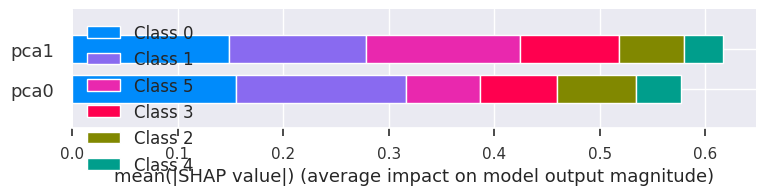

In [ ]:
interpret_model(tuned_et_pca, plot='summary')

In [ ]:
interpret_model(tuned_et_pca, plot='reason', observation=32)

In [ ]:
interpret_model(tuned_et_pca, plot='reason')